# Feature Engineering
 - 어떤 feature가 가장 중요한지 결정
 - 현실을 대변할 새로운 Feature 생성
 - 고차원의 Categorical변수를 Target Encoding
 - K-mean 클러스터링으로 특징 세분화
 - PCA로 데이터셋의 변동을 Feature들로 분해하여 설명
 
# Feature Engineering의 목표
 - 우리의 데이터를 우리가 해결할 문제에 맞게 변형시켜주기 위함
 - 예시: "적절한 온도": 습도, 풍속, 기온이 적절하게 결합된 것을 의미 --> 이것 또한 Feature Engineering
 
# Feature Engineering의 가이드
 - 변수와 타겟변수의 관계가 있어야 한다.
 - (회귀분석 예시) 독립변수들을 선형으로 연결한 것. 즉, 목표값에 대한 독립변수들의 관계를 선형으로 만드는 것이 선형회귀의 목표
 
# 땅값 예측 예시
 - 땅값을 예측함에 있어 한 변(Length)만을 가지고 예측하는 것은 바람직 하지 않다. 
 - 이를 Length * Length로 면적(Area)이라는 feature로 땅값과 관계를 봤을 때 선형회귀에 더 적합하다는 것을 볼 수 있다.
 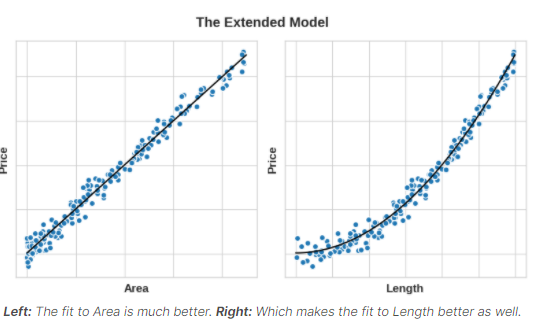
 
# 결론
 - 모델이 학습을 잘 하지 못하더라도 Feature Engineering을 통해 모델이 더 학습을 잘하는 데이터셋으로 변환하여 모델의 퍼포먼스를 가져갈 수 있다

# Example Code
 - Concrete Dataset (종속변수: 콘크리트가 버틸 수 있는 무게 (Compressive Strength))

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

df = pd.read_csv("./data/concrete.csv")
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### 우선은 Baseline을 잡은 후, Feature Engineering의 방향을 찾아보자

In [2]:
X = df.copy()
y = X.pop("CompressiveStrength")

# Model train
baseline = RandomForestRegressor(criterion="mae", random_state=0)
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
)
baseline_score = -1 * baseline_score.mean()

print(f"MAE Baseline Score: {baseline_score:.4}")

MAE Baseline Score: 8.232


### (생각): 그저 정량적인 숫자가 아닌, 비율로 변수를 만들면 어떨까?
 -> MAE 하락. 파생변수가 효과가 좋구나!

In [3]:
X = df.copy()
y = X.pop("CompressiveStrength")

# 비율 파생변수 생성
X["FCRatio"] = X["FineAggregate"] / X["CoarseAggregate"]
X["AggCmtRatio"] = (X["CoarseAggregate"] + X["FineAggregate"]) / X["Cement"]
X["WtrCmtRatio"] = X["Water"] / X["Cement"]

# Train
model = RandomForestRegressor(criterion="mae", random_state=0)
score = cross_val_score(
    model, X, y, cv=5, scoring="neg_mean_absolute_error"
)
score = -1 * score.mean()

print(f"MAE Score with Ratio Features: {score:.4}")

MAE Score with Ratio Features: 7.948
